In [1]:
import warnings
warnings.filterwarnings("ignore")
!pip install sklearn
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
merge_df=pd.merge(train,feature,on=["Store","Date"],how="inner")

In [14]:
merge_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y


In [8]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y


In [9]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from datetime import datetime as dt

In [10]:
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

Series([], Name: DateTimeObj, dtype: float64)

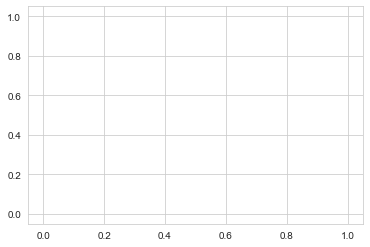

In [11]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [12]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Series([], Name: Weekly_Sales, dtype: float64)

In [13]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Series([], Name: Weekly_Sales, dtype: float64)

In [14]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,index,Weekly_Sales


In [15]:
walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

KeyError: 'Store'

In [16]:
walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]

NameError: name 'walmartstore' is not defined

In [ ]:
walmartstoredf.head()

In [ ]:
walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()

In [ ]:
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]

In [ ]:
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]

In [ ]:
walmartstoredf.head()

In [ ]:
plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()

In [ ]:
walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]

In [ ]:
walmartstoredf.head()

In [ ]:
walmartstoredf.Store.unique()

In [ ]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)

In [ ]:
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [ ]:
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [ ]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [ ]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

In [ ]:
wmLinear.coef_

In [ ]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)

In [ ]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [ ]:
walmartstoredf['Store'].unique()

In [ ]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)

In [ ]:
walmartstoredf.head()

In [ ]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

In [ ]:
XTrain.head()

In [ ]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

In [ ]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [ ]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

In [ ]:
# Dimensionality Reduction

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
alphas = np.linspace(10, 20, 10)

In [ ]:
testError = np.empty(10)

for i, alpha in enumerate(alphas) :
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))

In [ ]:
plt.plot(alphas, testError, 'r-')
plt.show()

In [ ]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear

In [ ]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)